## Load functions / packages and configure

In [3]:
%run functions/datahub.py

In [4]:
import re

In [5]:
mpl.rcParams["figure.figsize"] = 15, 12

## Load resource paths for datasets

In [6]:
domain = "https://datahub.io"
search_page_gdp = "/core/gdp"
search_page_world_cities = "/core/world-cities"

_, gdp_resources = process_datahub(search_page_gdp)
_, world_cities_resources = process_datahub(search_page_world_cities)

Search /core/gdp: Resource received correctly
Get available resource path /core/gdp: Data type - file size saved
Get available resource path /core/gdp: Data type - file size saved
Get available resource path /core/gdp: Data type - file size saved
Search /core/world-cities: Resource received correctly
Get available resource path /core/world-cities: Data type - file size saved
Get available resource path /core/world-cities: Data type - file size saved
Get available resource path /core/world-cities: Data type - file size saved


## Load datasets into pd.DataFrame

In [7]:
gdp = pd.read_csv(f"{domain}{gdp_resources['csv']}")
world = pd.read_csv(f"{domain}{world_cities_resources['csv']}")

## Process data

### GDP

<AxesSubplot:xlabel='Year'>

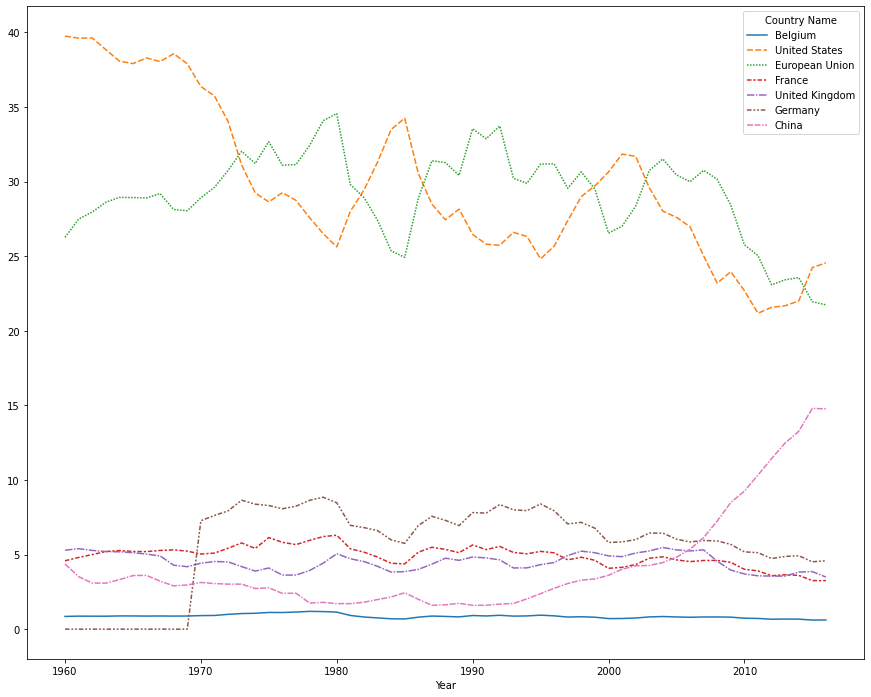

In [8]:
gdp_pivot = gdp.pivot_table(index = "Country Name", columns = "Year", values = "Value", fill_value = 0)
subset = gdp_pivot.loc[["Belgium", "United States", "European Union", "France", "United Kingdom", "Germany", "World", "China"]]
subset_perc_vs_world = subset.drop("World", axis = 0) / subset.loc["World"] * 100
sns.lineplot(data = subset_perc_vs_world.T)

(1995.0, 2016.0)

<Figure size 1000x600 with 0 Axes>

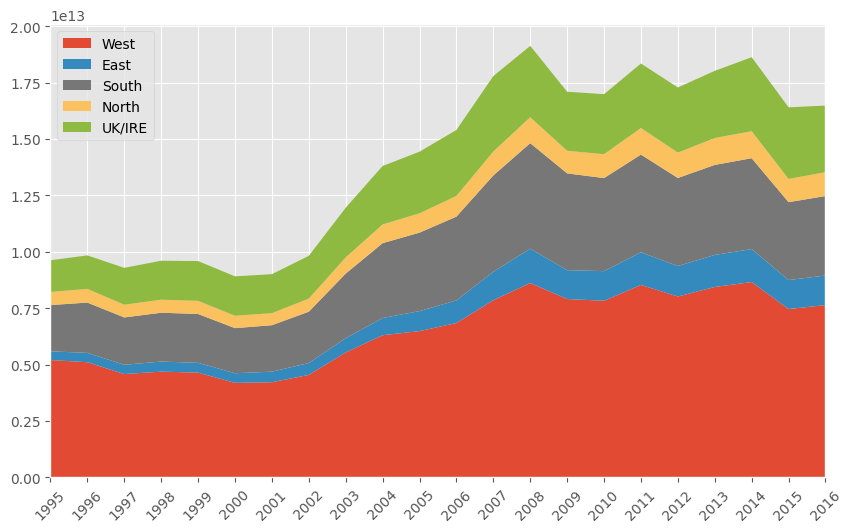

In [9]:
eu_28 = ["Belgium", "France", "Netherlands", "Luxembourg", "Germany", "Poland", "Ireland", "Denmark", "Sweden", "Finland", "Spain", "Italy", "Cyprus", 
         "Romania", "Slovenia", "Slovak Republic", "Croatia", "Portugal", "Malta", "Czech Republic", "Bulgaria", "Austria", "Estonia", "Greece", "Hungary",
         "Latvia", "Lithuania", "United Kingdom"]
eu_gdp = gdp_pivot.loc[eu_28]
eu_gdp = eu_gdp[eu_gdp > 0].dropna(axis = 1)
eu_grouped = pd.DataFrame(columns = eu_gdp.columns)
eu_grouped.loc["West"] = eu_gdp.loc[["Belgium", "Luxembourg", "Netherlands", "Germany", "France", "Austria"]].sum()
eu_grouped.loc["East"] = eu_gdp.loc[["Poland", "Romania", "Slovenia", "Slovak Republic", "Croatia", "Czech Republic",
                                     "Hungary", "Latvia", "Lithuania", "Bulgaria", "Estonia"]].sum()
eu_grouped.loc["South"] = eu_gdp.loc[["Portugal", "Spain", "Italy", "Greece", "Malta", "Cyprus"]].sum()
eu_grouped.loc["North"] = eu_gdp.loc[["Finland", "Sweden", "Denmark"]].sum()
eu_grouped.loc["UK/IRE"] = eu_gdp.loc[["United Kingdom", "Ireland"]].sum()
eu_grouped
# print(mpl.style.available)
mpl.style.use("gdp_stack.mplstyle")
fig, ax = plot_stack_gdp(eu_grouped)
ax.legend(loc = "upper left", labels = eu_grouped.index)
# ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:.0f}"))
ax.set_xlim([1995, 2016])
# r = re.compile("Cze")
# list(filter(r.match, gdp_pivot.index))
# %timeit list(filter(r.match, gdp_pivot.index))
# %timeit [x for x in gdp_pivot.index if r.match(x)]

<Figure size 1000x600 with 0 Axes>

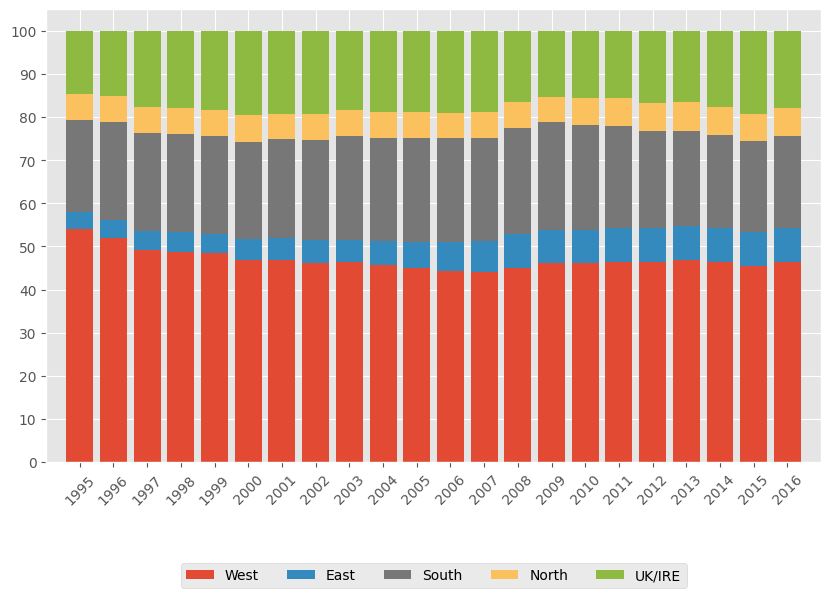

In [10]:
eu_total = eu_grouped.sum()
eu_grouped_perc_of_tot = eu_grouped / eu_total * 100
fig , ax = plot_bar_perc(eu_grouped_perc_of_tot)
ax.set_xlim([1994,2017])
ax.set_yticks(range(0,101,10))

### Cities

In [11]:
world[world.country.apply(lambda x: x.startswith("Bel"))]
world[world.name == "Paris"]

,name,country,subcountry,geonameid
6818,Paris,France,Île-de-France,2988507
